### Finite Impulse Response (FIR) filters

In [1]:
import numpy as np
from numpy import pi, cos, sin, convolve
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt


plots = lambda rows = 1, cols = 1, figsize=(20,10): plt.subplots(rows, cols, figsize=figsize)

In [2]:
#get a sample dataset
#days = np.random.randint(10, 45, 10)
days = np.array([21, 26, 10, 17, 20, 10, 44, 16, 38, 16])

In [3]:
#create plot
def plot_(ys, x=None, colours=None, markersize=10):
    f, ax = plots(1)
    y = ys[0]
    if x: x = x
    else: x = np.arange(len(y))
        
    if colours: colour = colours
        
    for i,y in enumerate(ys):
        ax.plot(x, y, colour[i], markersize = markersize)
        ax.plot(x, y, colour[i][0])
    plt.show()
    return f, ax

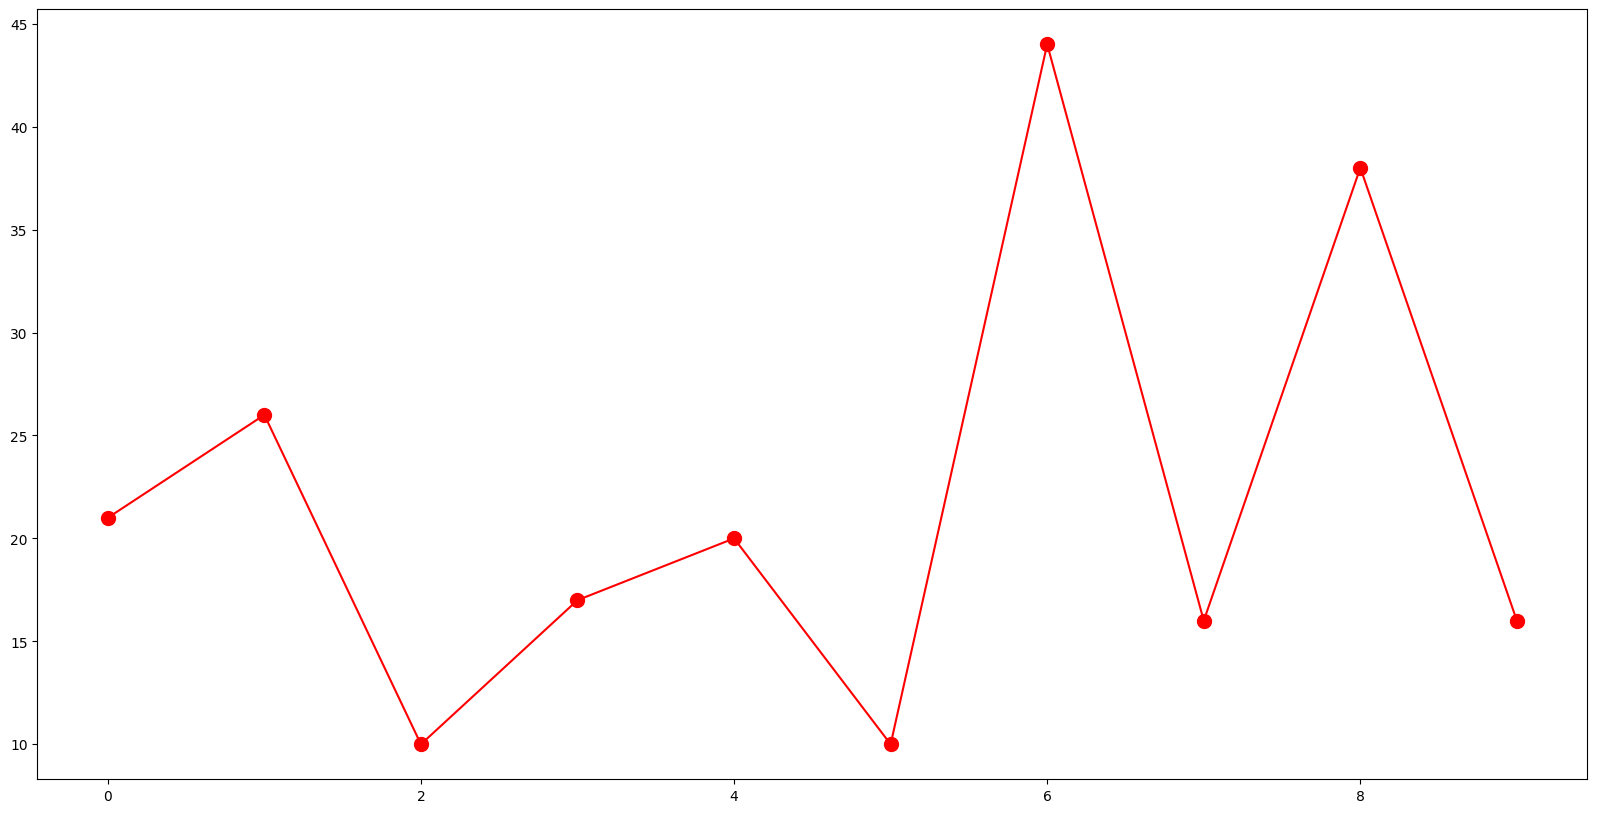

In [4]:
f1, ax1=plot_([days], colours=['ro'])

In [5]:
# calcula the avg temp over the last 5 days
# recall output is of size (h - k + 2p)/s + 1
avgs = [0]*10
for i in range(6):
#     avgs[i] = np.mean(days[i:i+5])
    avgs[i+4] = np.mean(days[i:i+5])
print(f'5 day average: {avgs}')

5 day average: [0, 0, 0, 0, 18.8, 16.6, 20.2, 21.4, 25.6, 24.8]


In [6]:
#but in the end of the day mean is a convolution
kernel = np.array([1/5]*5)
avgs2 = np.convolve(days, kernel, mode = 'valid')
print(f'{avgs2}')

[18.8 16.6 20.2 21.4 25.6 24.8]


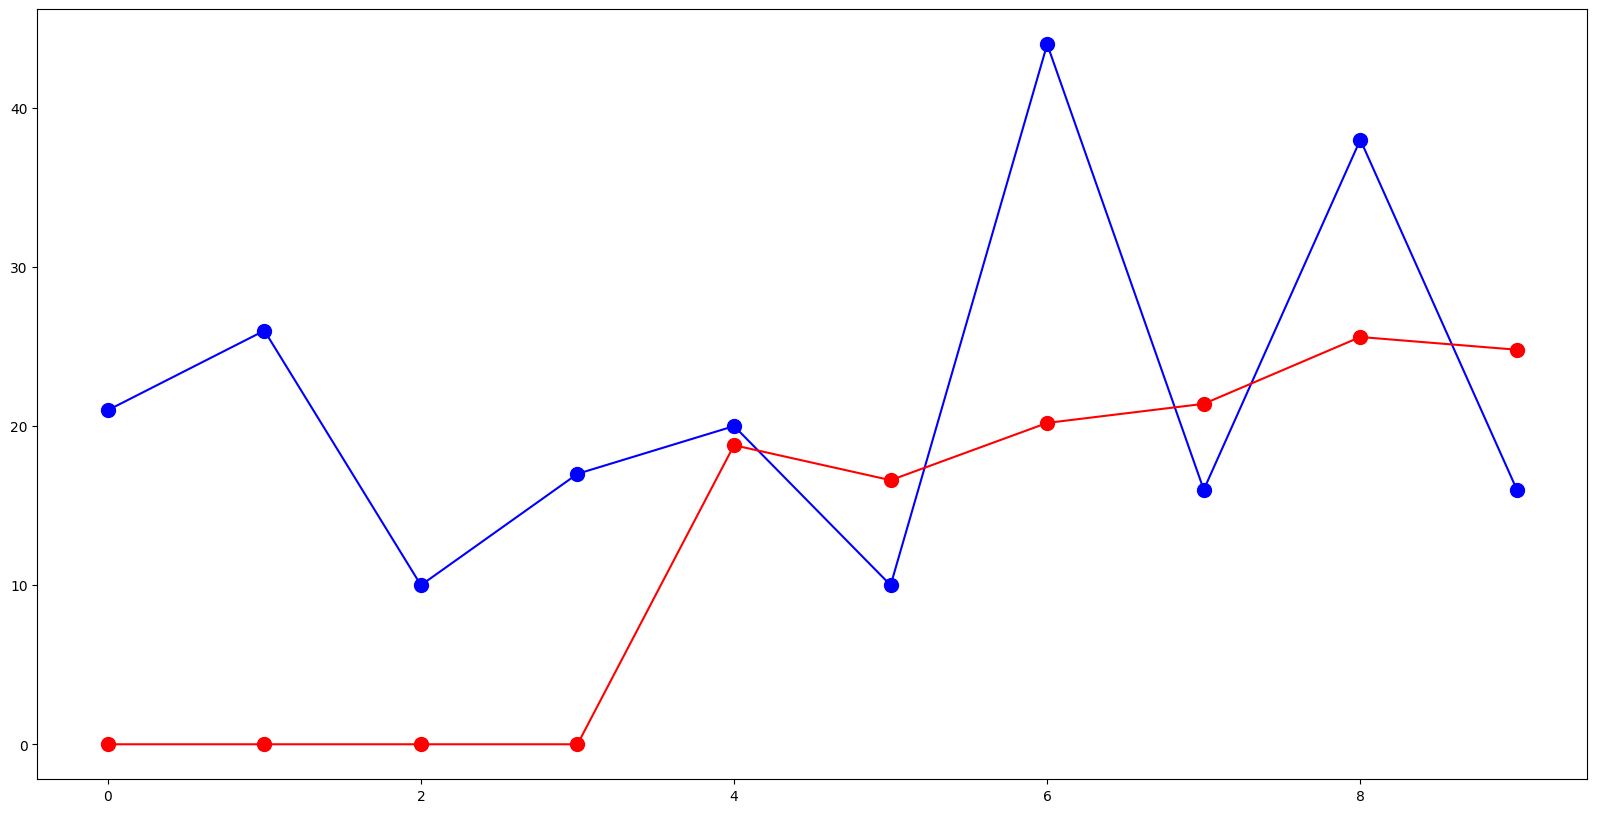

In [7]:
f2, ax2 = plot_([days, avgs], colours=['bo', 'ro'])

C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2050430336.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax3.stem(days[::-1], use_line_collection=True)


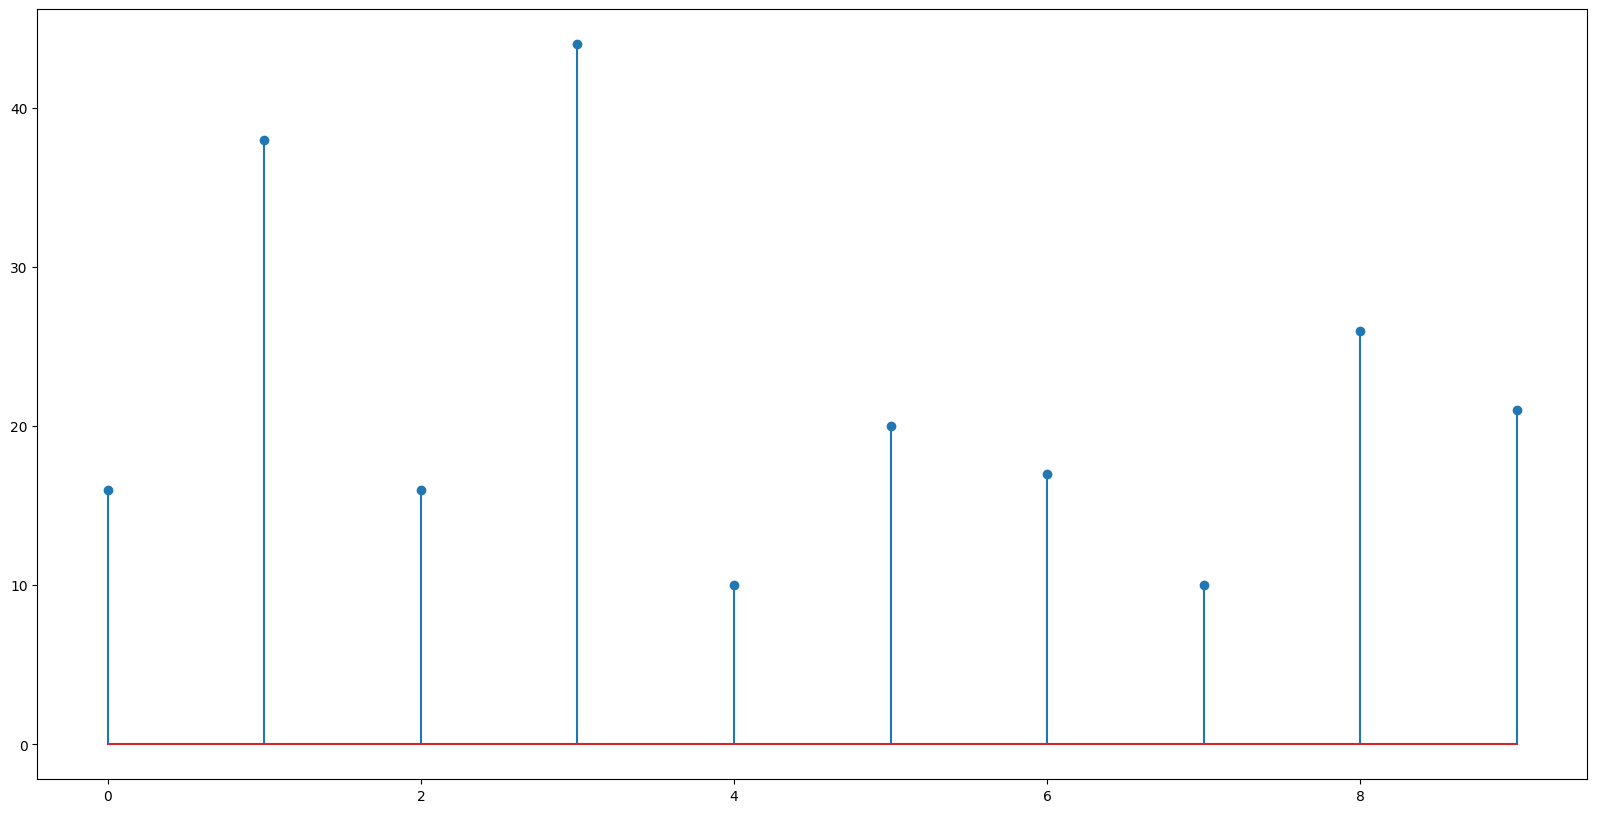

In [8]:
f3, ax3 = plots()
ax3.stem(days[::-1], use_line_collection=True)
plt.show()

C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\213614139.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax4[0].stem(days[::-1], use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\213614139.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax4[1].stem([0]*5 + [0.2]*5, use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\213614139.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows

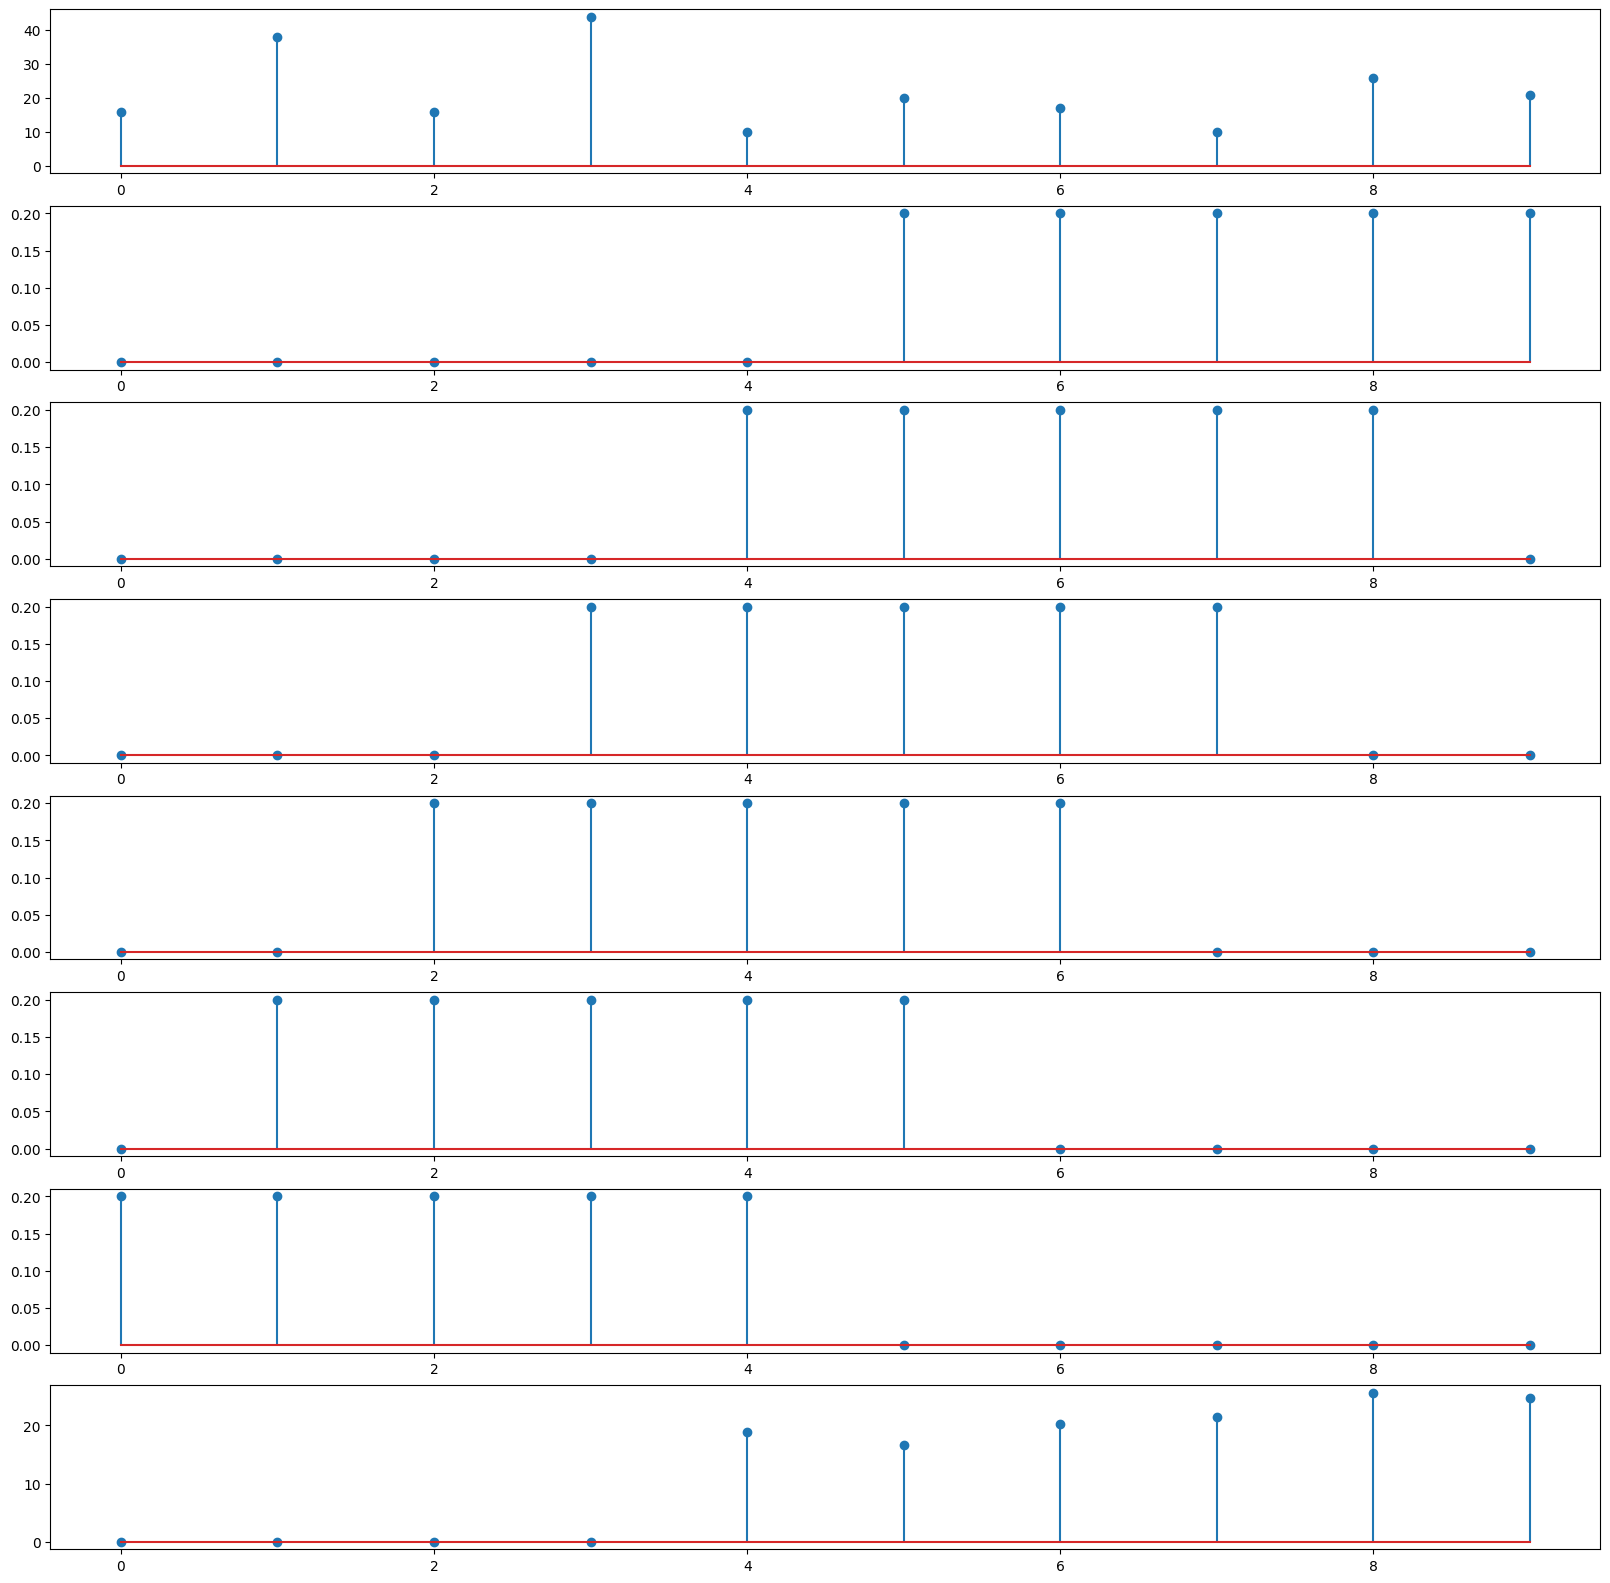

In [9]:
f4, ax4 = plots(8,1,(20,20))
ax4[0].stem(days[::-1], use_line_collection = True)
ax4[1].stem([0]*5 + [0.2]*5, use_line_collection = True)

ax4[2].stem([0]*4+[0.2]*5+[0], use_line_collection = True)

ax4[3].stem([0]*3+[0.2]*5+[0]*2, use_line_collection = True)

ax4[4].stem([0]*2+[0.2]*5+[0]*3, use_line_collection = True)
ax4[5].stem([0]+[0.2]*5+[0]*4, use_line_collection = True)
ax4[6].stem([0.2]*5+[0]*5, use_line_collection = True)

ax4[7].stem(avgs, use_line_collection = True)

plt.show()

C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2319473829.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax4[0].stem(days[::-1], use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2319473829.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax4[i+1].stem([0]*(5 - i) + [0.2]*5 + [0]*i, use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2319473829.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If an

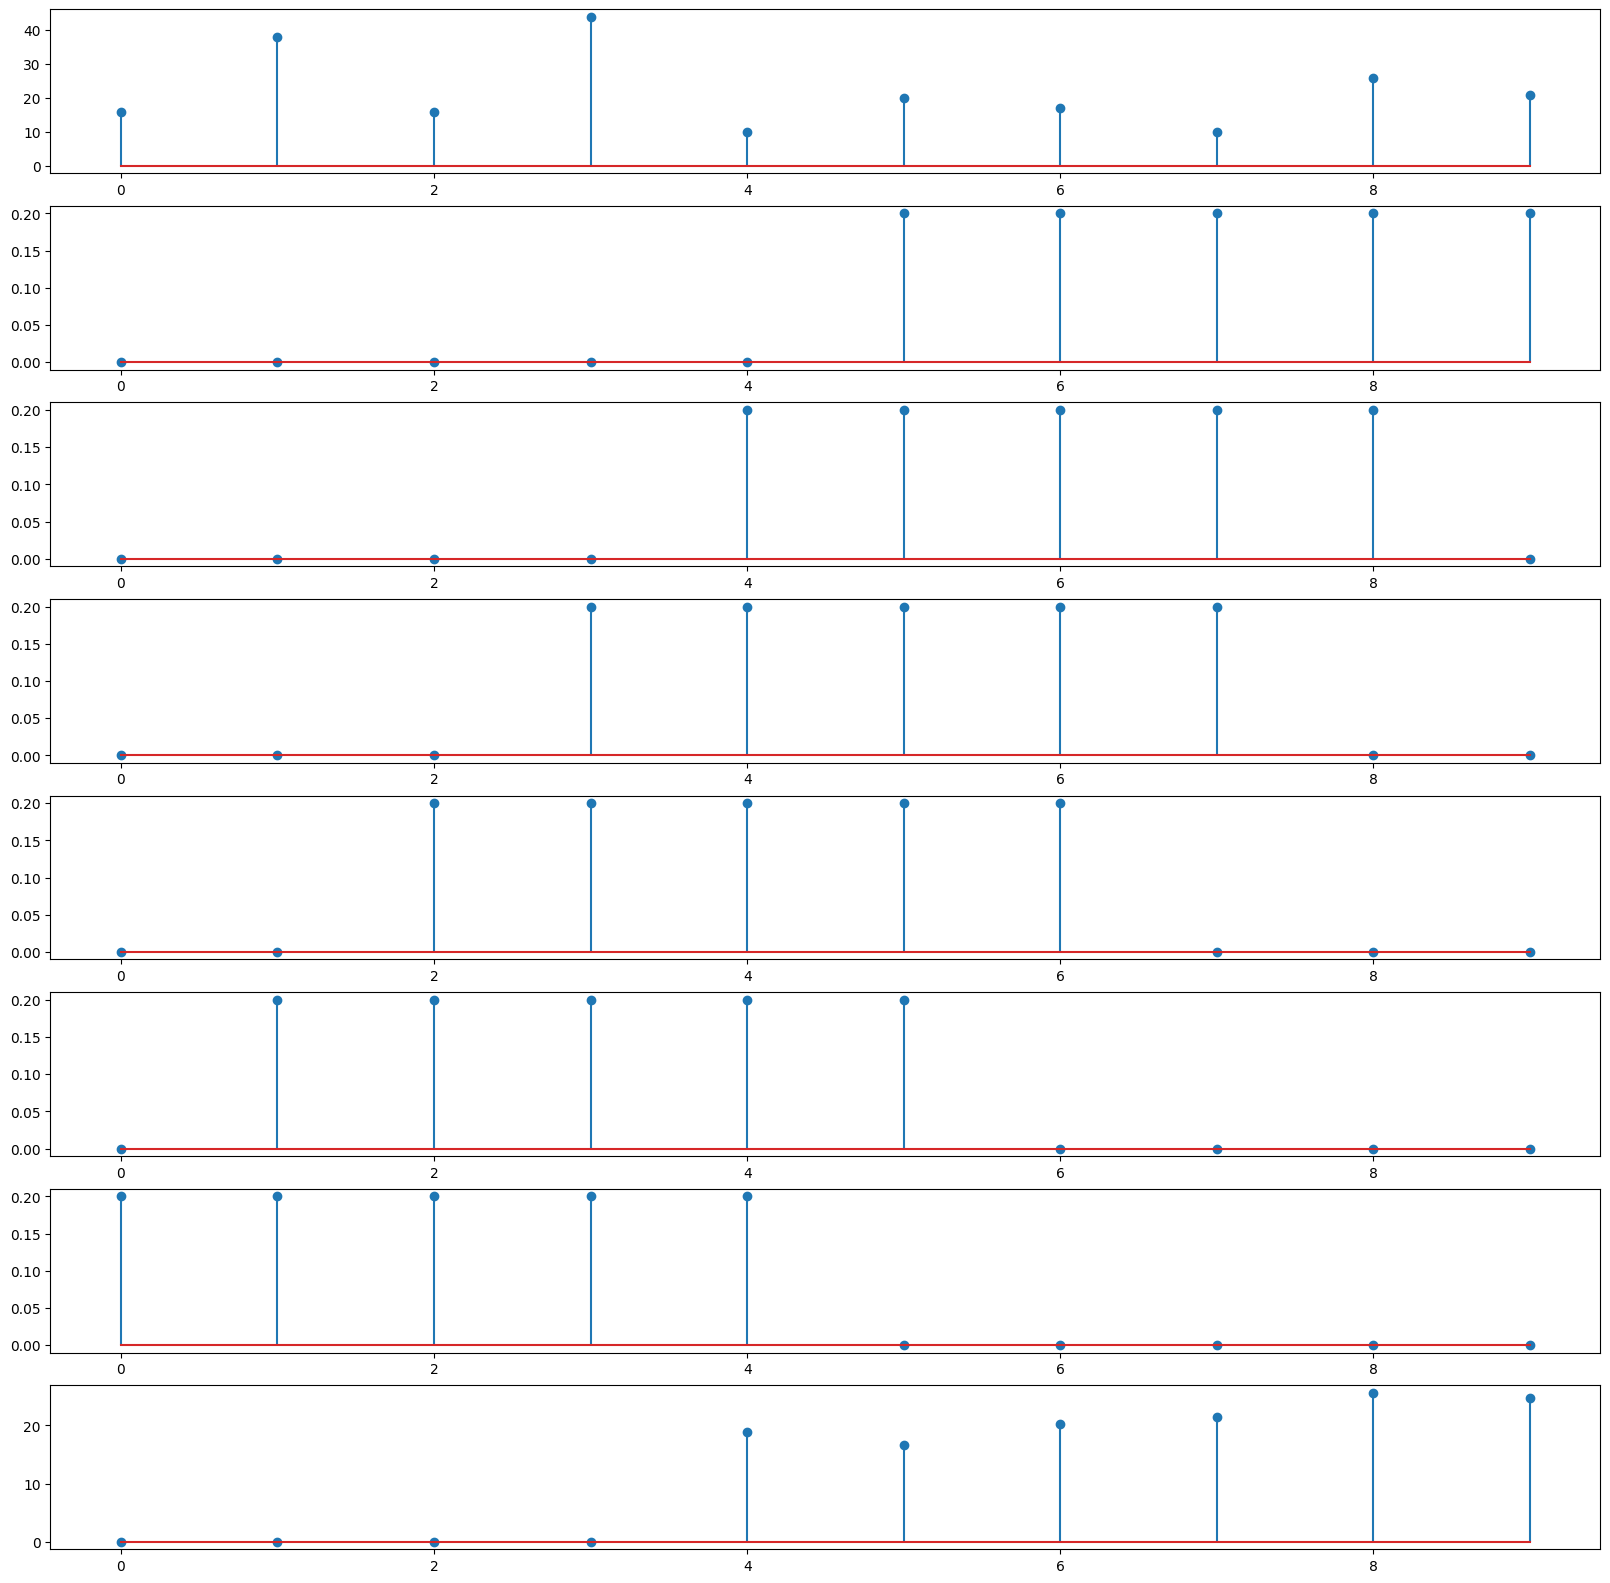

In [10]:
f4, ax4 = plots(8,1,(20,20))
ax4[0].stem(days[::-1], use_line_collection = True)
num_vals = len(days)
for i in range(6):
    ax4[i+1].stem([0]*(5 - i) + [0.2]*5 + [0]*i, use_line_collection = True)

ax4[-1].stem(avgs, use_line_collection = True)

plt.show()

### Impulse response

In [11]:
delta = np.zeros(9)
delta[4] = 1
avgs2 = np.array([0.2]*5)

In [12]:
result = np.convolve(delta, avgs2, 'valid')
print(result)

[0.2 0.2 0.2 0.2 0.2]


In [13]:
np.concatenate([np.array([0]*4), result])

array([0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2])

C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2438876283.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax5[0].stem(delta[::-1], use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2438876283.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax5[i+1].stem([0]*(5 - i) + [0.2]*5 + [0]*i, use_line_collection = True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_13296\2438876283.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If a

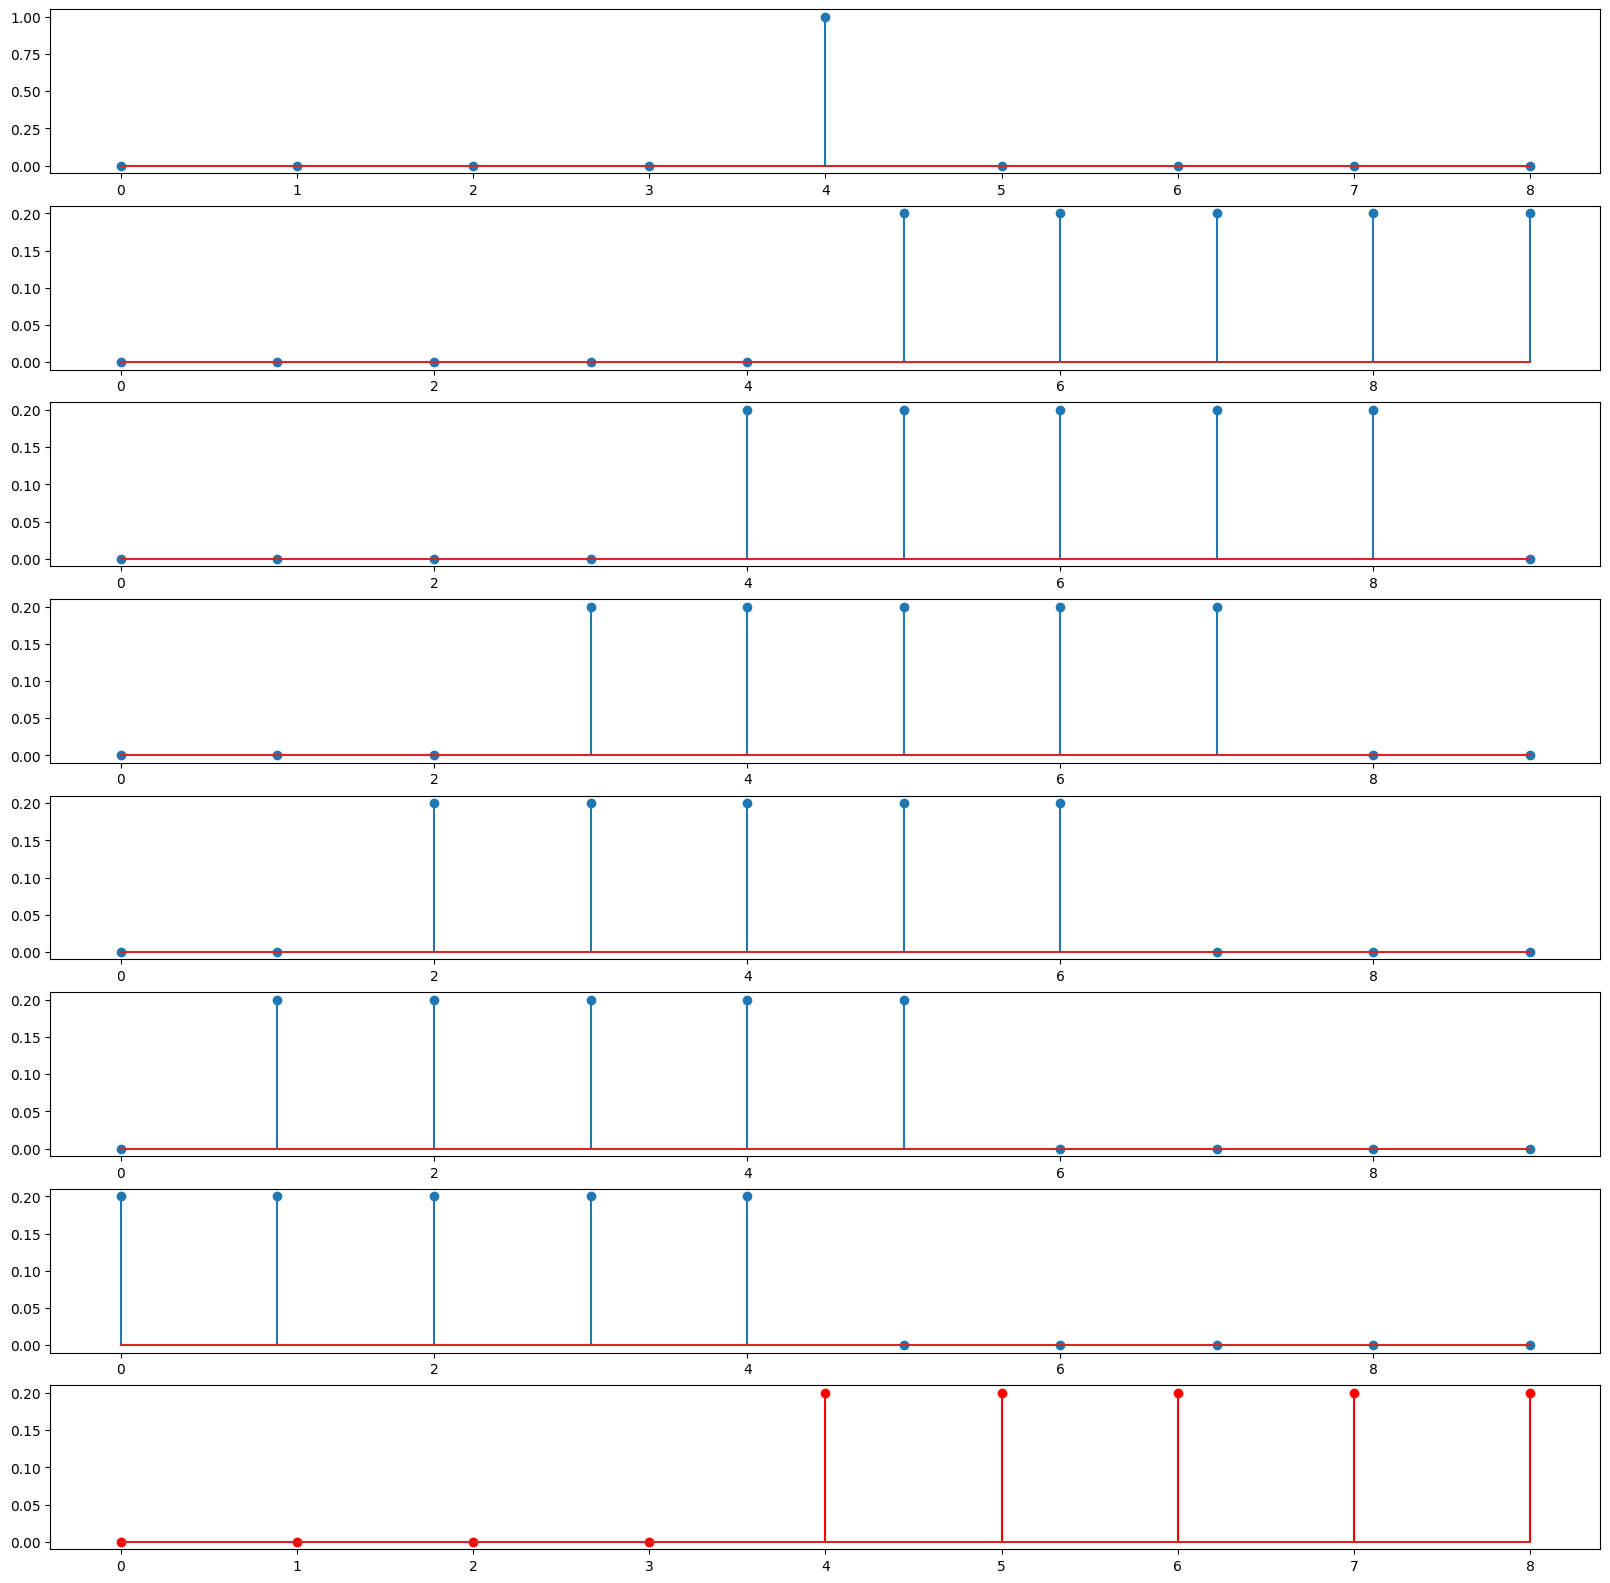

In [14]:
f5, ax5 = plots(8,1,(20,20))
ax5[0].stem(delta[::-1], use_line_collection = True)
for i in range(6):
    ax5[i+1].stem([0]*(5 - i) + [0.2]*5 + [0]*i, use_line_collection = True)

# ax5[-1].stem([0]*4 + list[result], use_line_collection = True, markerfmt='ro', linefmt='r')
ax5[-1].stem(np.concatenate([np.array([0]*4), result]),
             use_line_collection = True, markerfmt='ro', linefmt='r')

plt.show()

### Analyse the frequency response

In [15]:
lpf1 = np.zeros(64)
lpf1[:5] = 0.2
LPF1 = fft(lpf1)

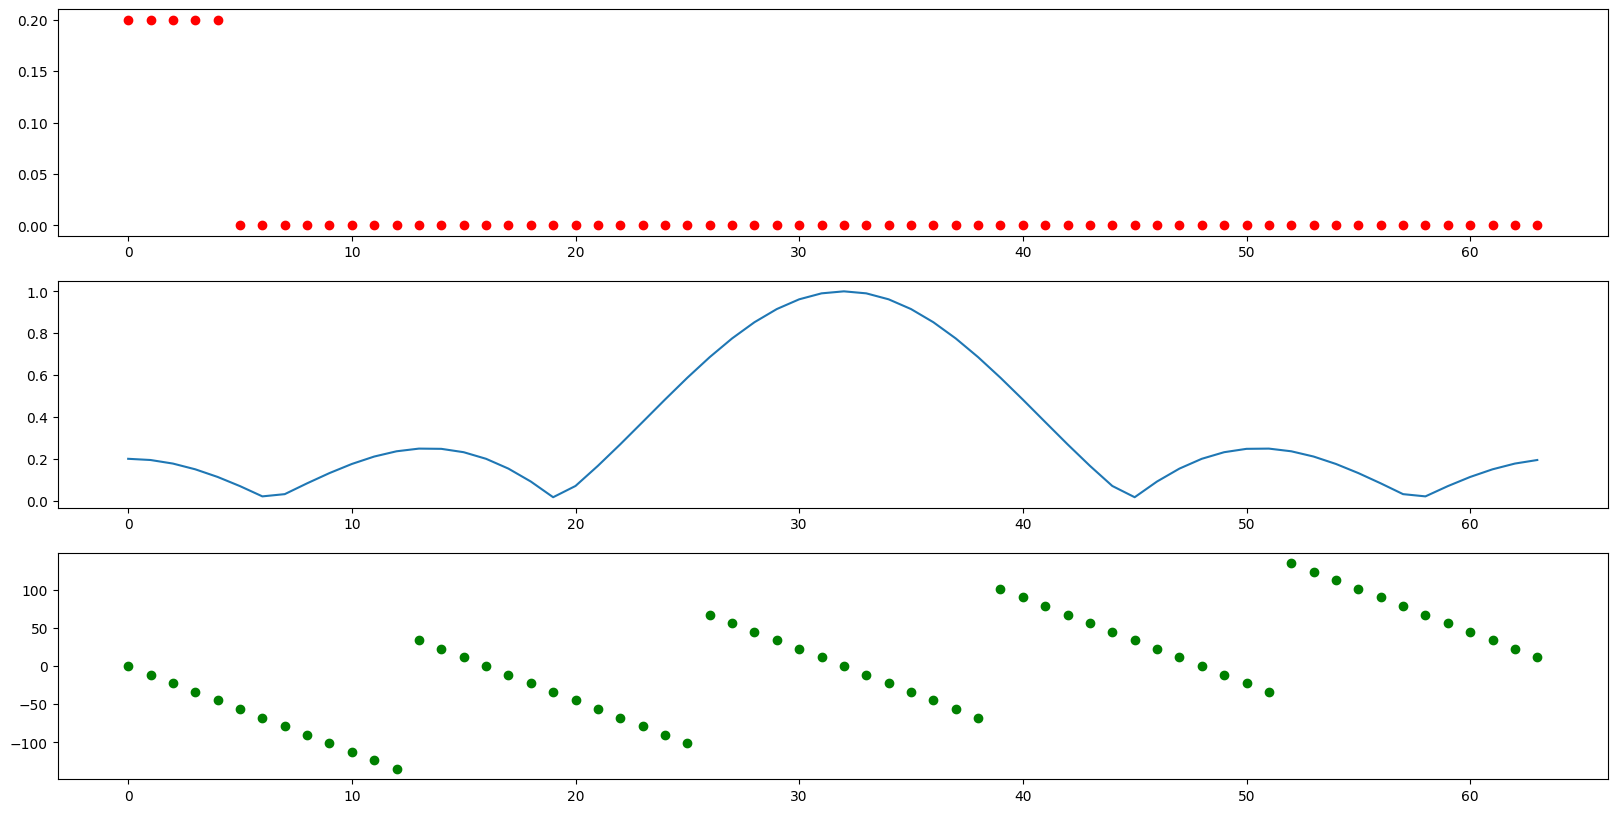

In [34]:
f_lpf, ax_lpf = plots(3)
ax_lpf[0].plot(lpf1, 'ro')
ax_lpf[1].plot(fftshift(abs(LPF1)))
ax_lpf[2].plot(np.angle(LPF1, deg=True), 'go')
plt.show()

In [42]:
# emphasis in freq. response
# assume fs=64
fs = 64
ts = 1/fs
f_0 = fs/32
f_0_2 = 3*fs/32
total_time = 1
N = fs*total_time
n = np.arange(N)
x_0 = np.sin(2*pi*f_0*n*ts)
x_0_2 = np.sin(2*pi*f_0_2*n*ts)

filtered_x0 = convolve(lpf1, x_0, 'full')
filtered_x2 = convolve(lpf1, x_0_2, 'full')

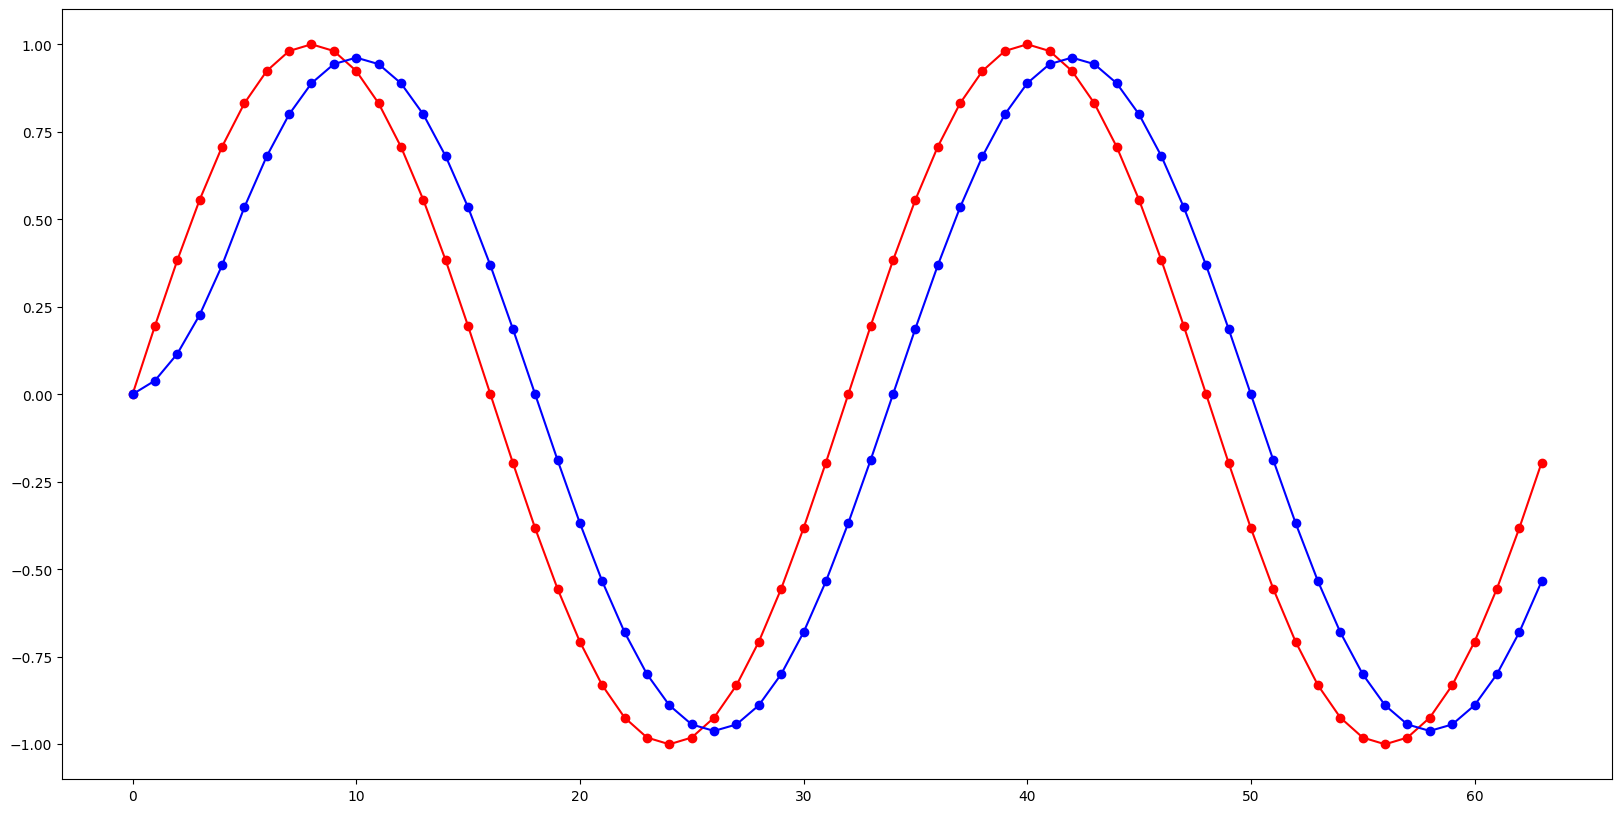

In [38]:
f, ax = plots()
ax.plot(x_0, 'ro')
ax.plot(x_0, 'r')
ax.plot(filtered_x0[:64], 'bo')
ax.plot(filtered_x0[:64], 'b')
plt.show()


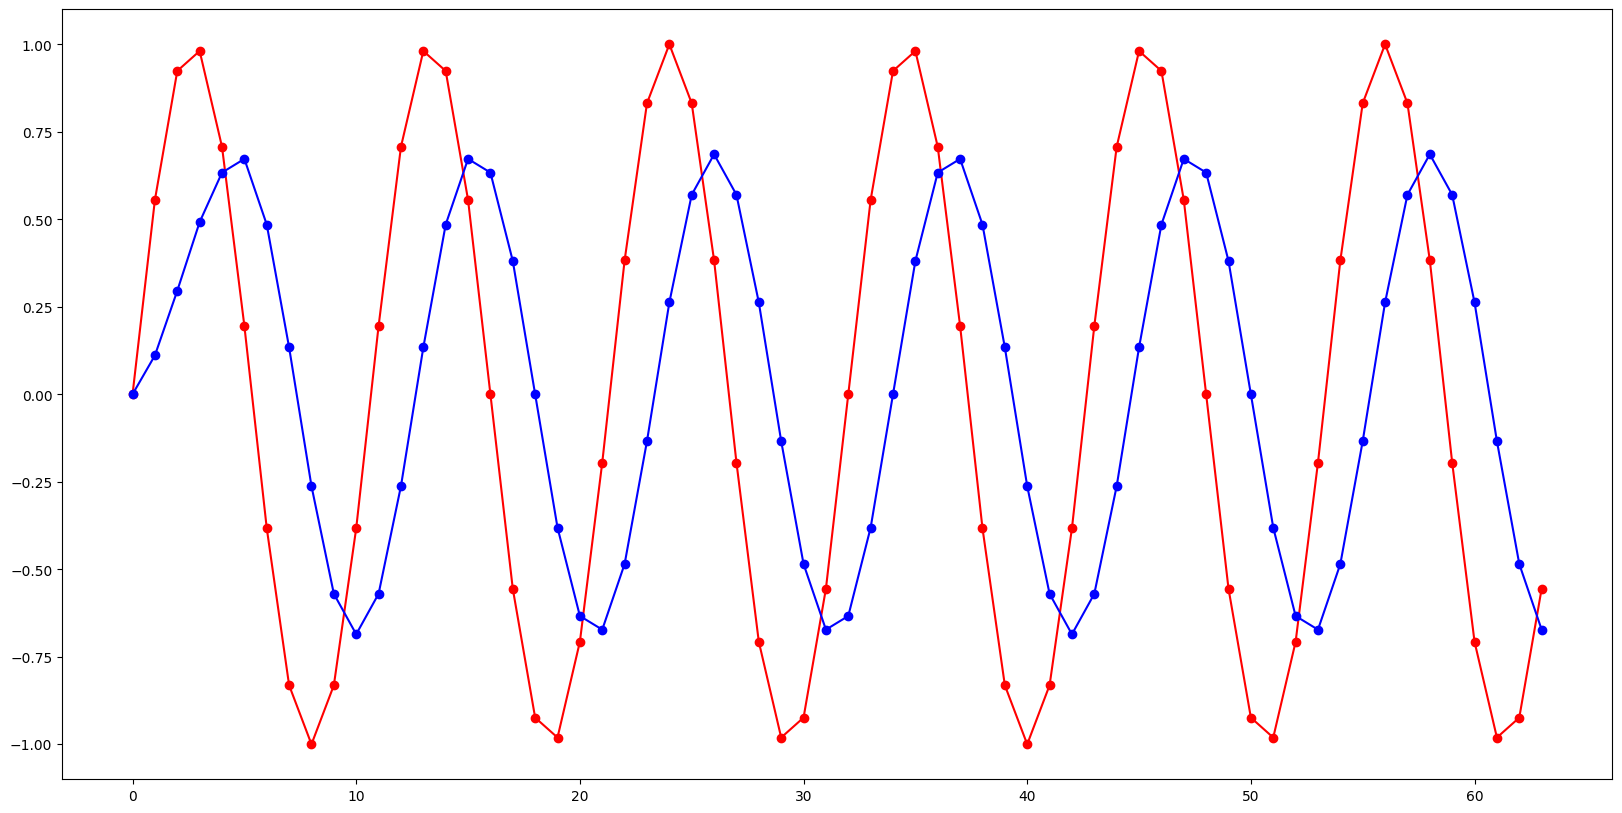

In [43]:
f, ax = plots()
ax.plot(x_0_2, 'ro')
ax.plot(x_0_2, 'r')
ax.plot(filtered_x2[:64], 'bo')
ax.plot(filtered_x2[:64], 'b')
plt.show()

In [44]:
# Using other coefficients
lpf2 = np.zeros(64)
lpf3 = np.zeros(64)
lpf2[:5] = [0.1, 0.2, 0.2, 0.2, 0.1]
lpf3[:5] = [0.04, 0.12, 0.20, 0.12, 0.04]
LPF2 = fft(lpf2)
LPF3 = fft(lpf3)

In [21]:
filtered_x0_f2 = convolve(lpf2, x_0, 'full')
filtered_x2_f2 = convolve(lpf2, x_0_2, 'full')

filtered_x0_f3 = convolve(lpf3, x_0, 'full')
filtered_x2_f3 = convolve(lpf3, x_0_2, 'full')

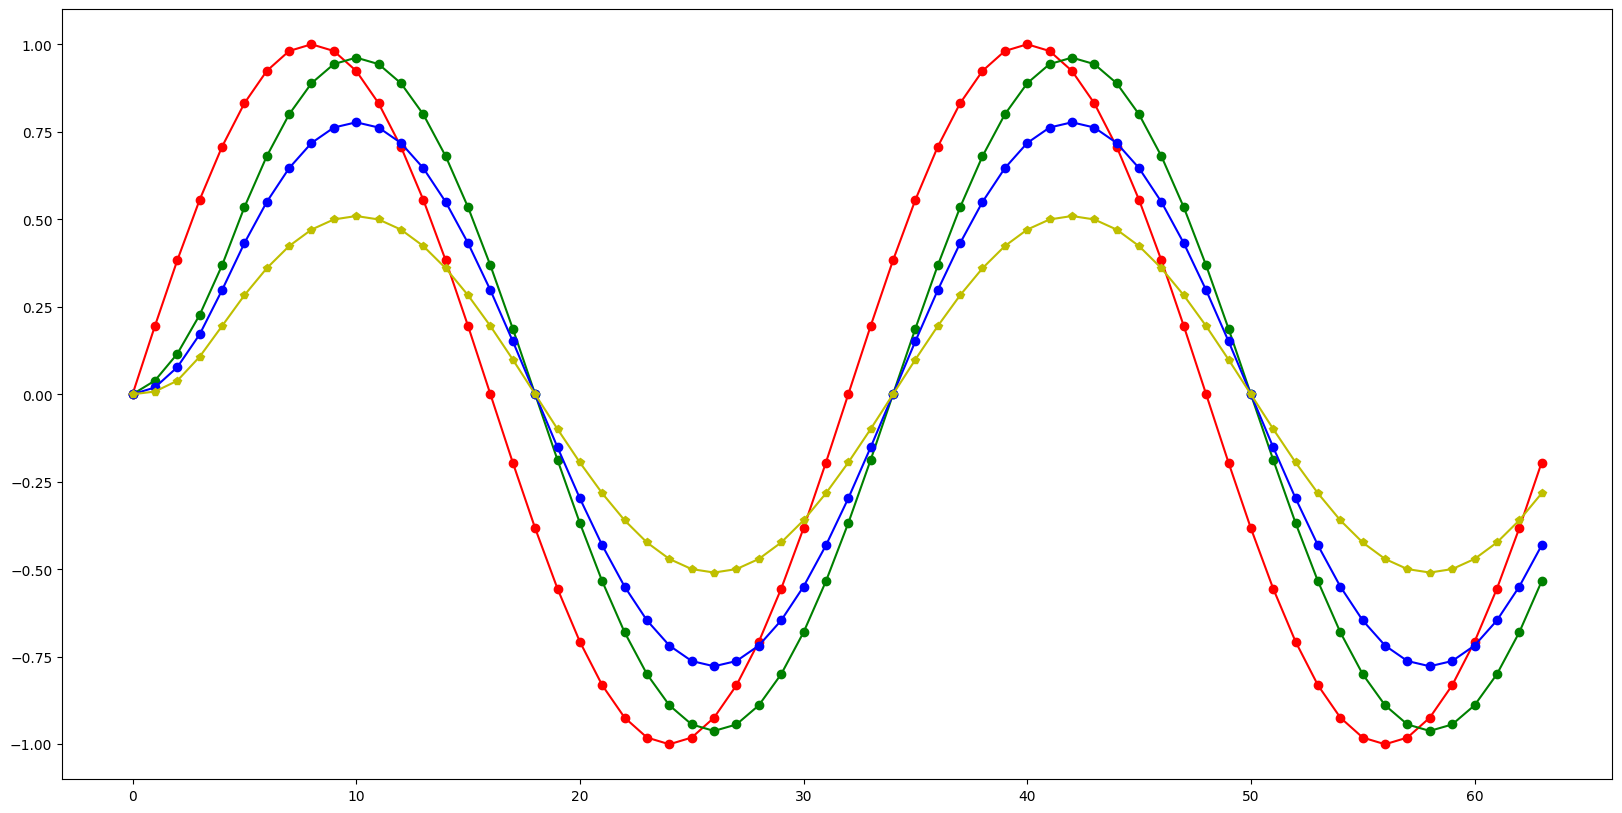

In [22]:
f, ax = plots()
ax.plot(x_0, 'ro')
ax.plot(x_0, 'r')

ax.plot(filtered_x0[:64], 'go')
ax.plot(filtered_x0[:64], 'g')

ax.plot(filtered_x0_f2[:64], 'bo')
ax.plot(filtered_x0_f2[:64], 'b')

ax.plot(filtered_x0_f3[:64], 'yp')
ax.plot(filtered_x0_f3[:64], 'y')
plt.show()


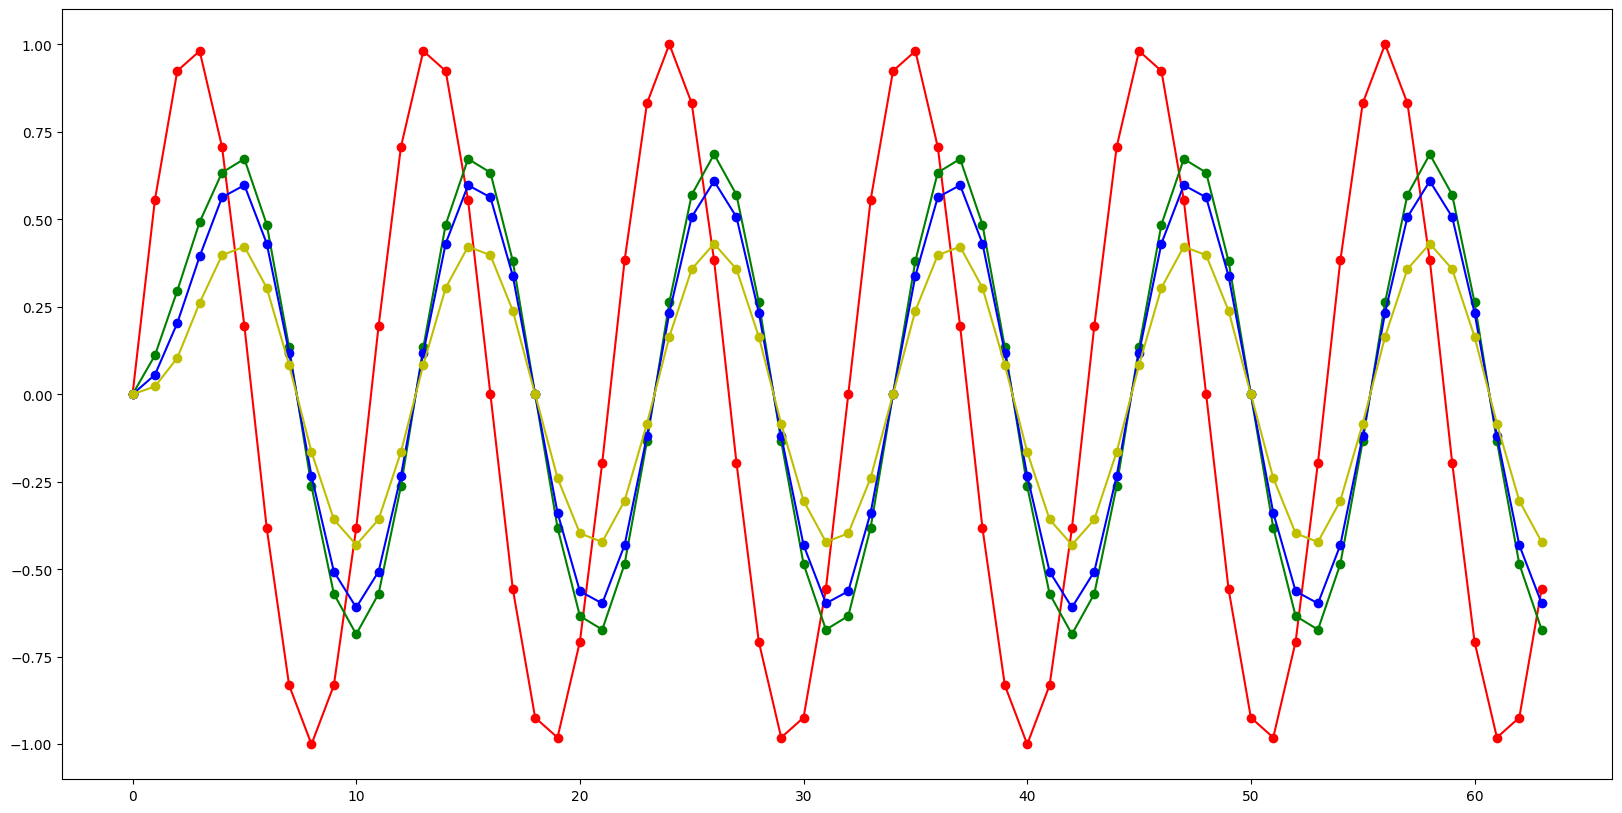

In [23]:
f, ax = plots()
ax.plot(x_0_2, 'ro')
ax.plot(x_0_2, 'r')

ax.plot(filtered_x2[:64], 'go')
ax.plot(filtered_x2[:64], 'g')

ax.plot(filtered_x2_f2[:64], 'bo')
ax.plot(filtered_x2_f2[:64], 'b')

ax.plot(filtered_x2_f3[:64], 'yo')
ax.plot(filtered_x2_f3[:64], 'y')

plt.show()

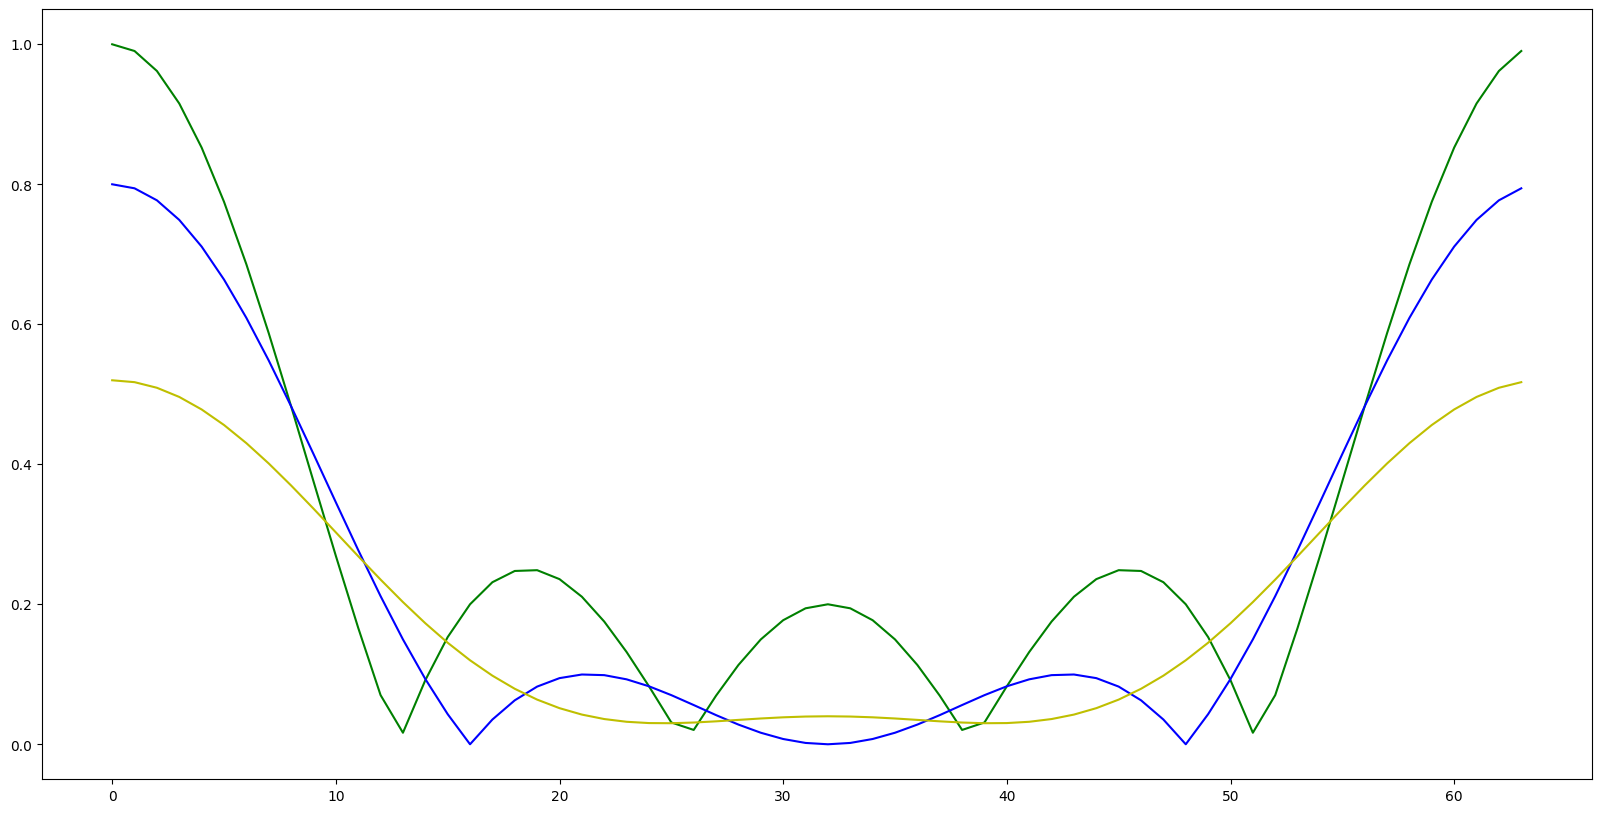

In [45]:
f, ax = plots()
ax.plot(abs(LPF1), 'g')
ax.plot(abs(LPF2), 'b')
ax.plot(abs(LPF3), 'y')
plt.show()

### LPF design

In [25]:
LPF4 = np.zeros(32)
LPF4[13:20] = 1


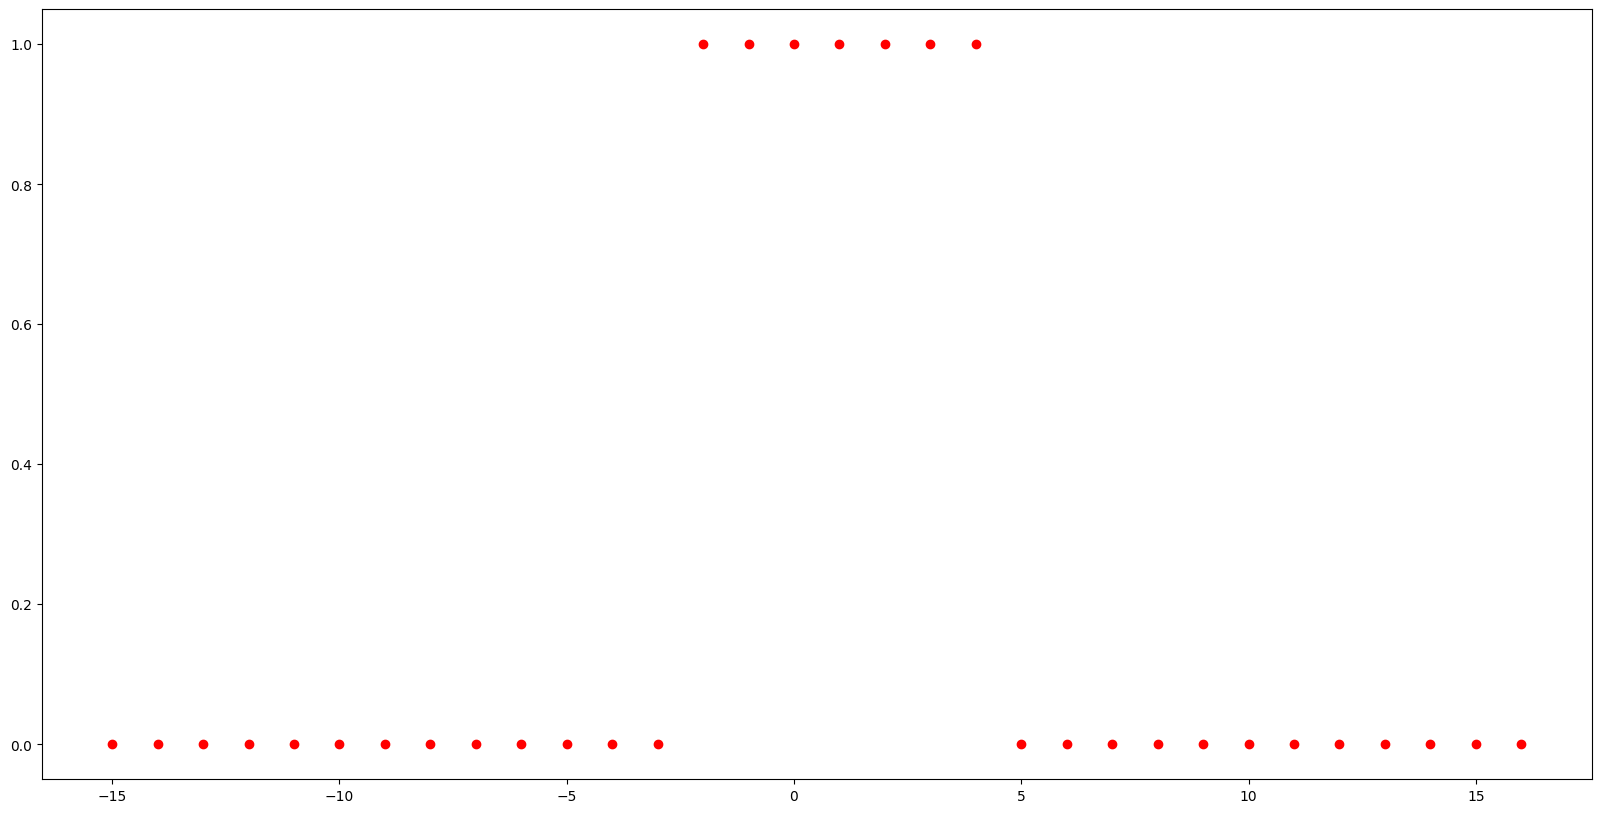

In [26]:
f, ax = plots()
ax.plot(np.arange(-len(LPF4)//2+1, len(LPF4)//2+1), LPF4, 'ro')
plt.show()

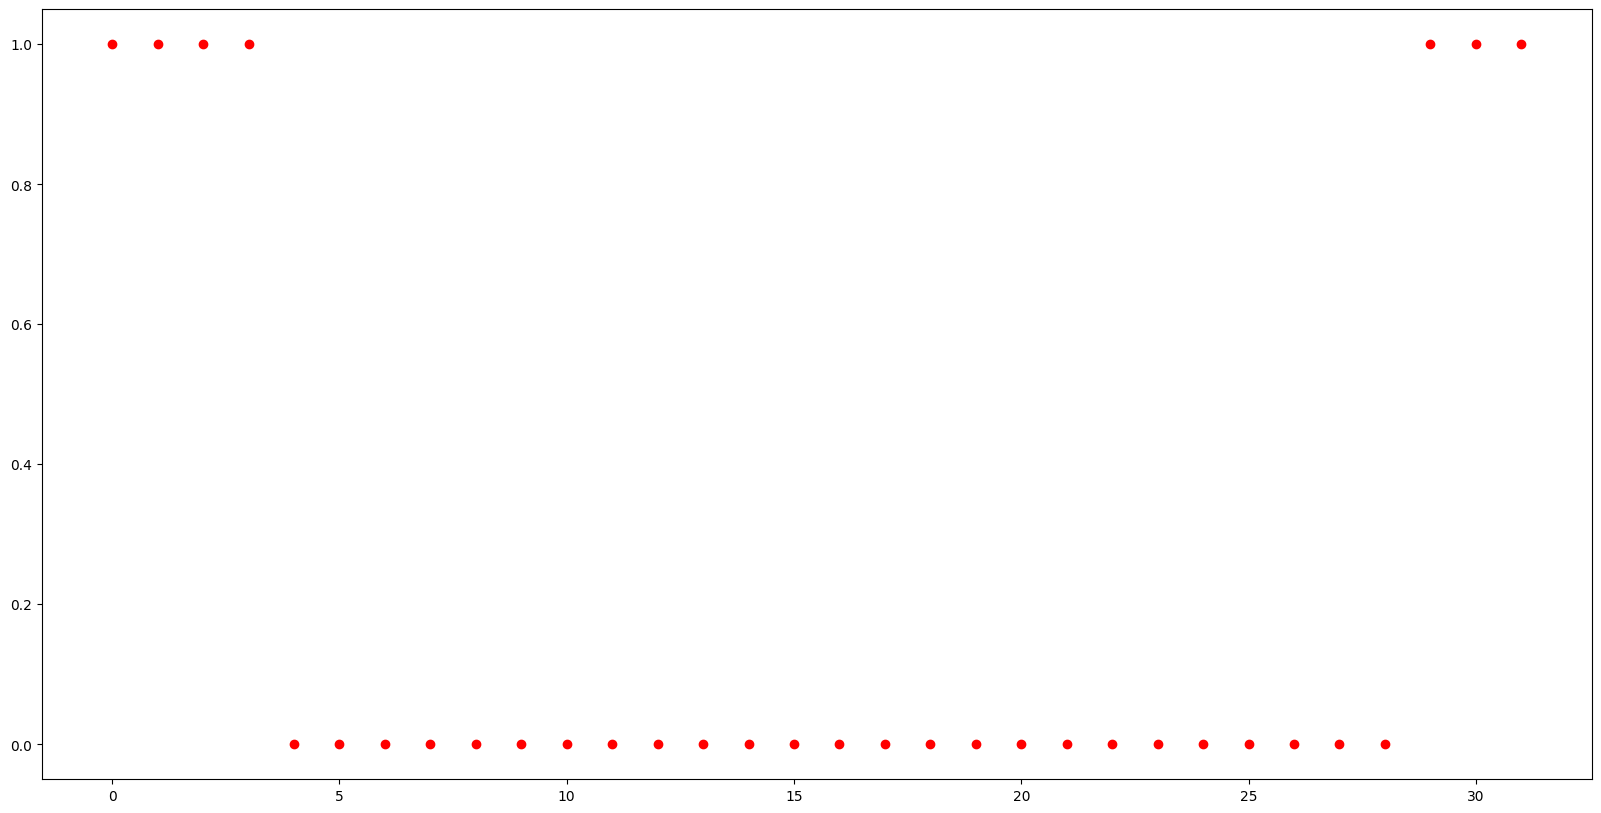

In [27]:
LPF4 = fftshift(LPF4)
lpf4 = ifft(LPF4)
f, ax = plots()
ax.plot(LPF4, 'ro')
plt.show()


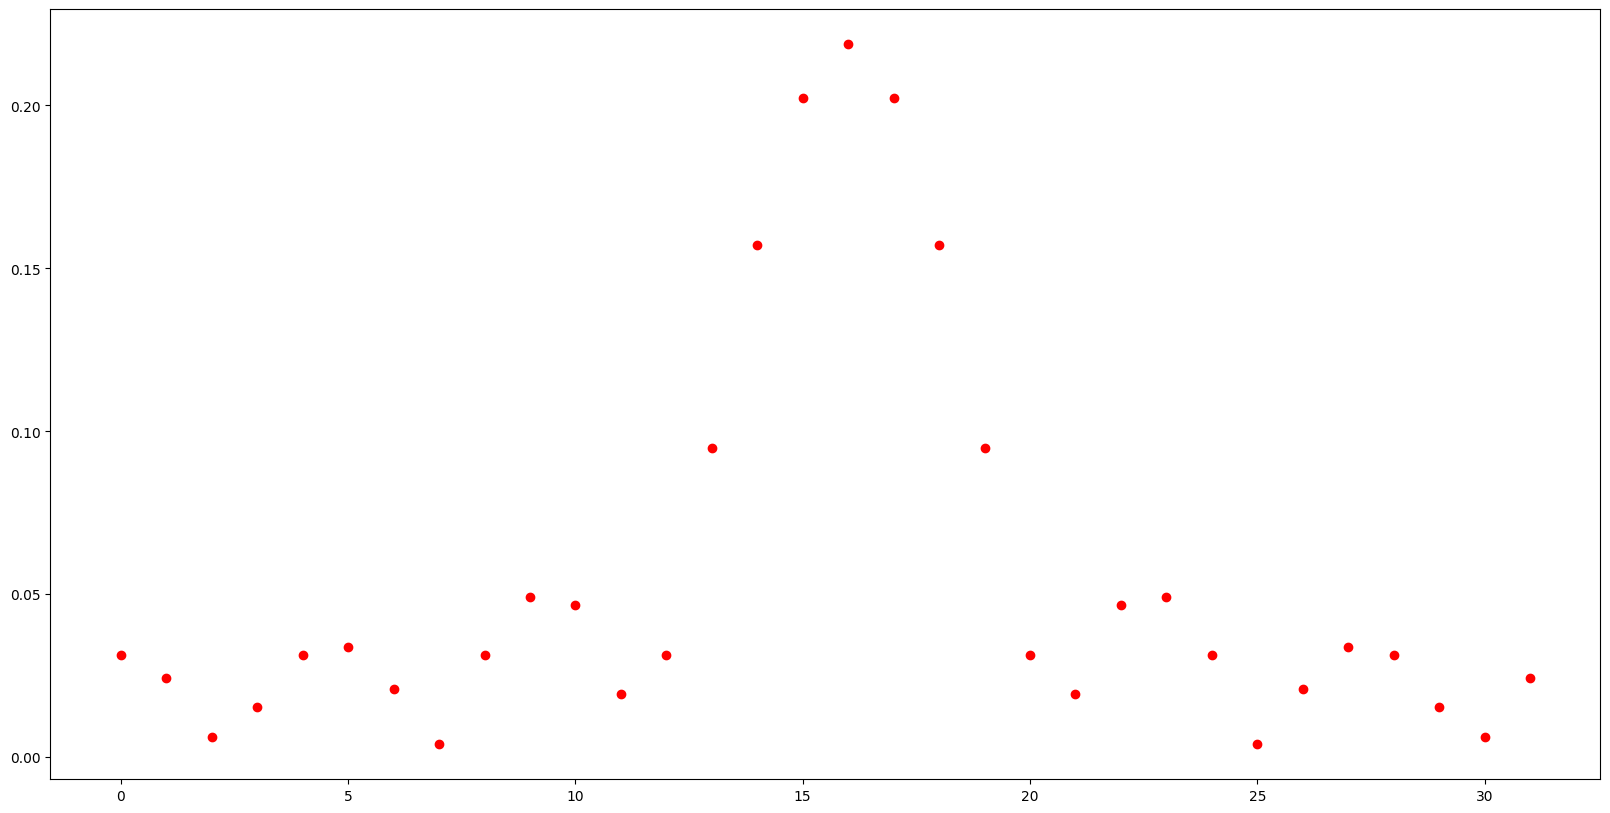

In [28]:
f, ax=plots()
ax.plot(abs(fftshift(lpf4)), 'ro')
# ax.plot(abs((lpf4)), 'ro')
plt.show()

In [29]:
#how the number of taps affect the filter
lpf4_9 = fftshift(lpf4)[12:21]
lpf4_19 = fftshift(lpf4)[6:26]


LPF4_9 = fft((lpf4_9))
LPF4_19 = fft((lpf4_19))
LPF4_ = fft((lpf4))

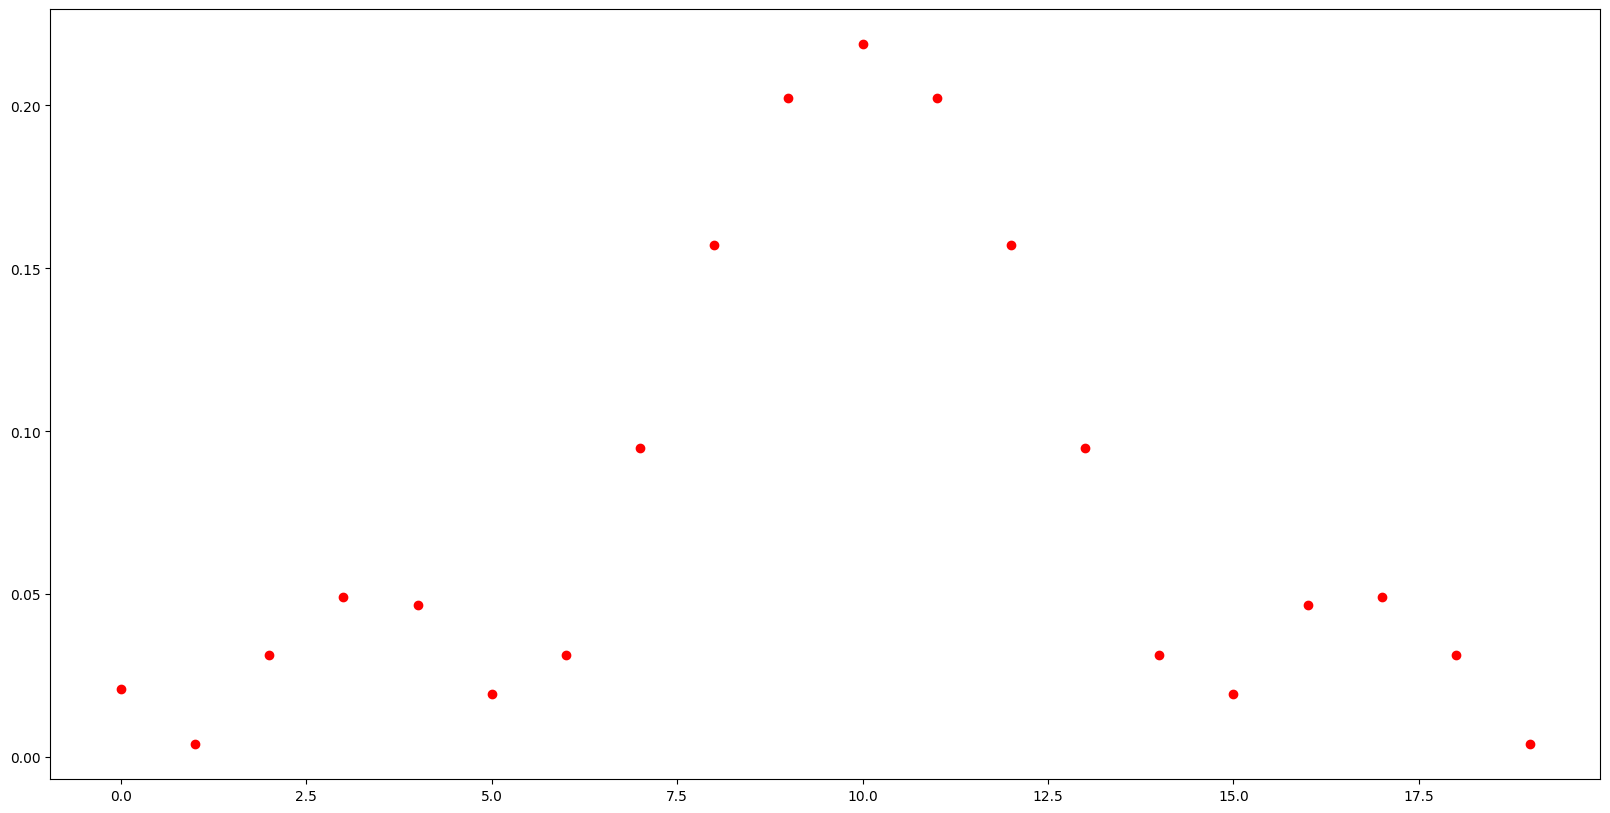

In [30]:
f, ax = plots()
ax.plot(abs(lpf4_19), 'ro')
plt.show()

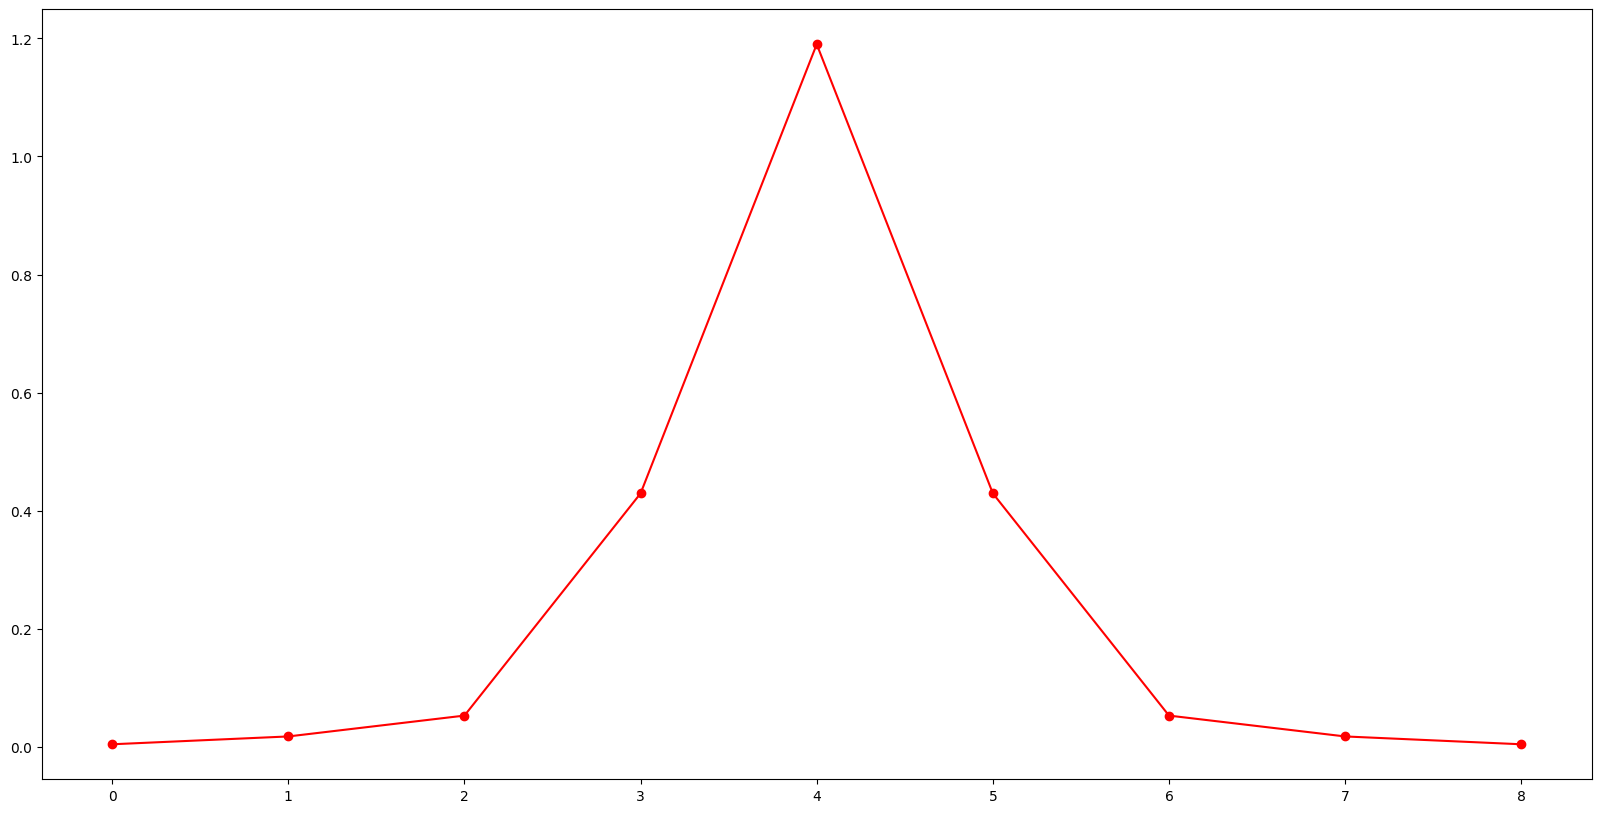

In [31]:
f, ax = plots()
ax.plot(abs(fftshift(LPF4_9)), 'ro')
ax.plot(abs(fftshift(LPF4_9)), 'r')
plt.show()

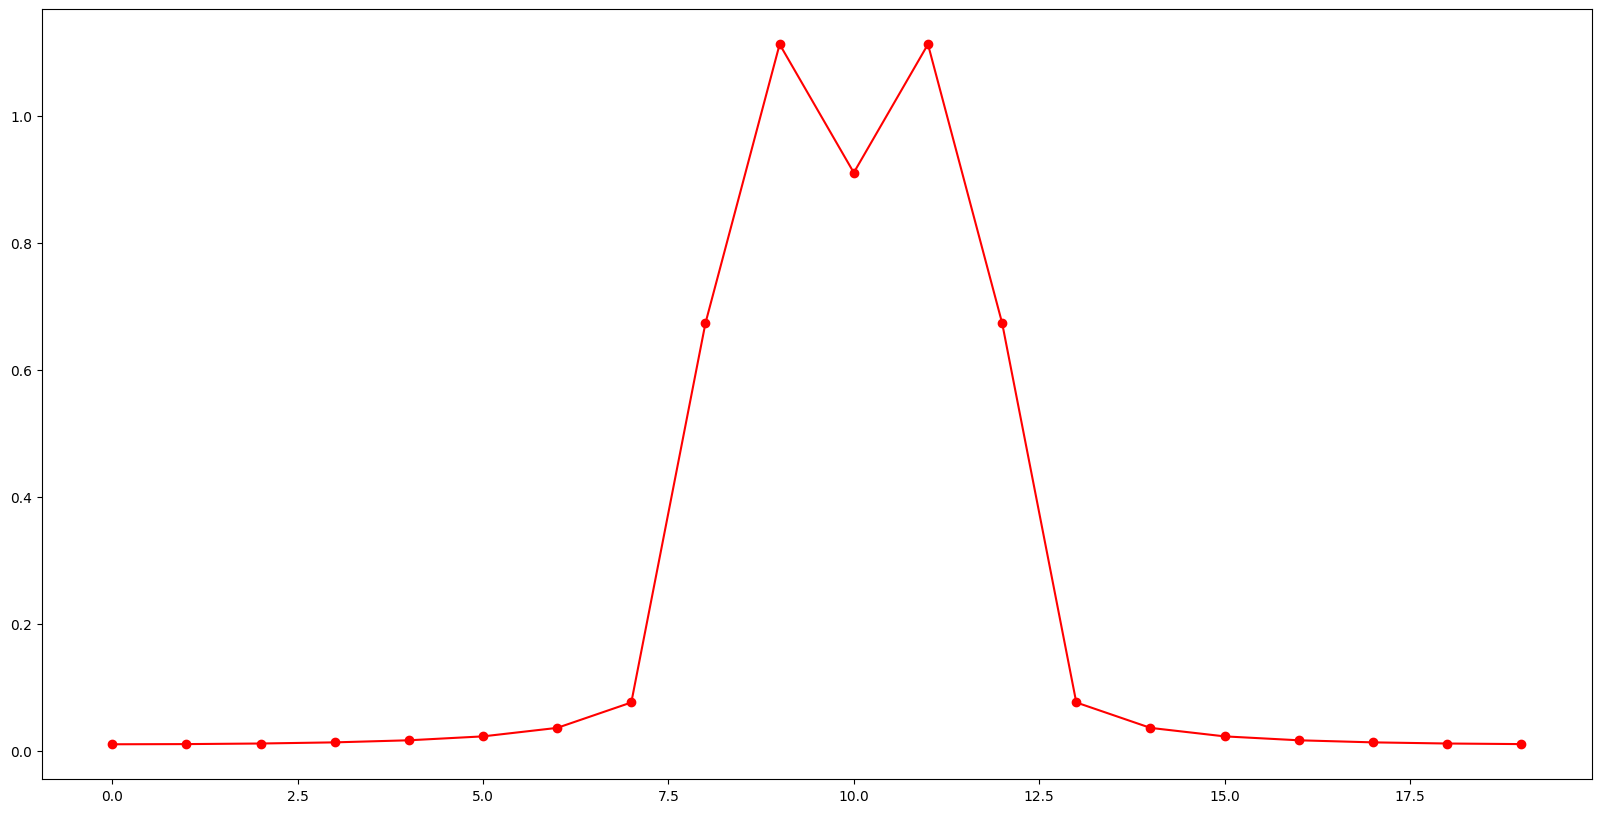

In [32]:
f, ax = plots()
ax.plot(abs(fftshift(LPF4_19)), 'ro')
ax.plot(abs(fftshift(LPF4_19)), 'r')
plt.show()

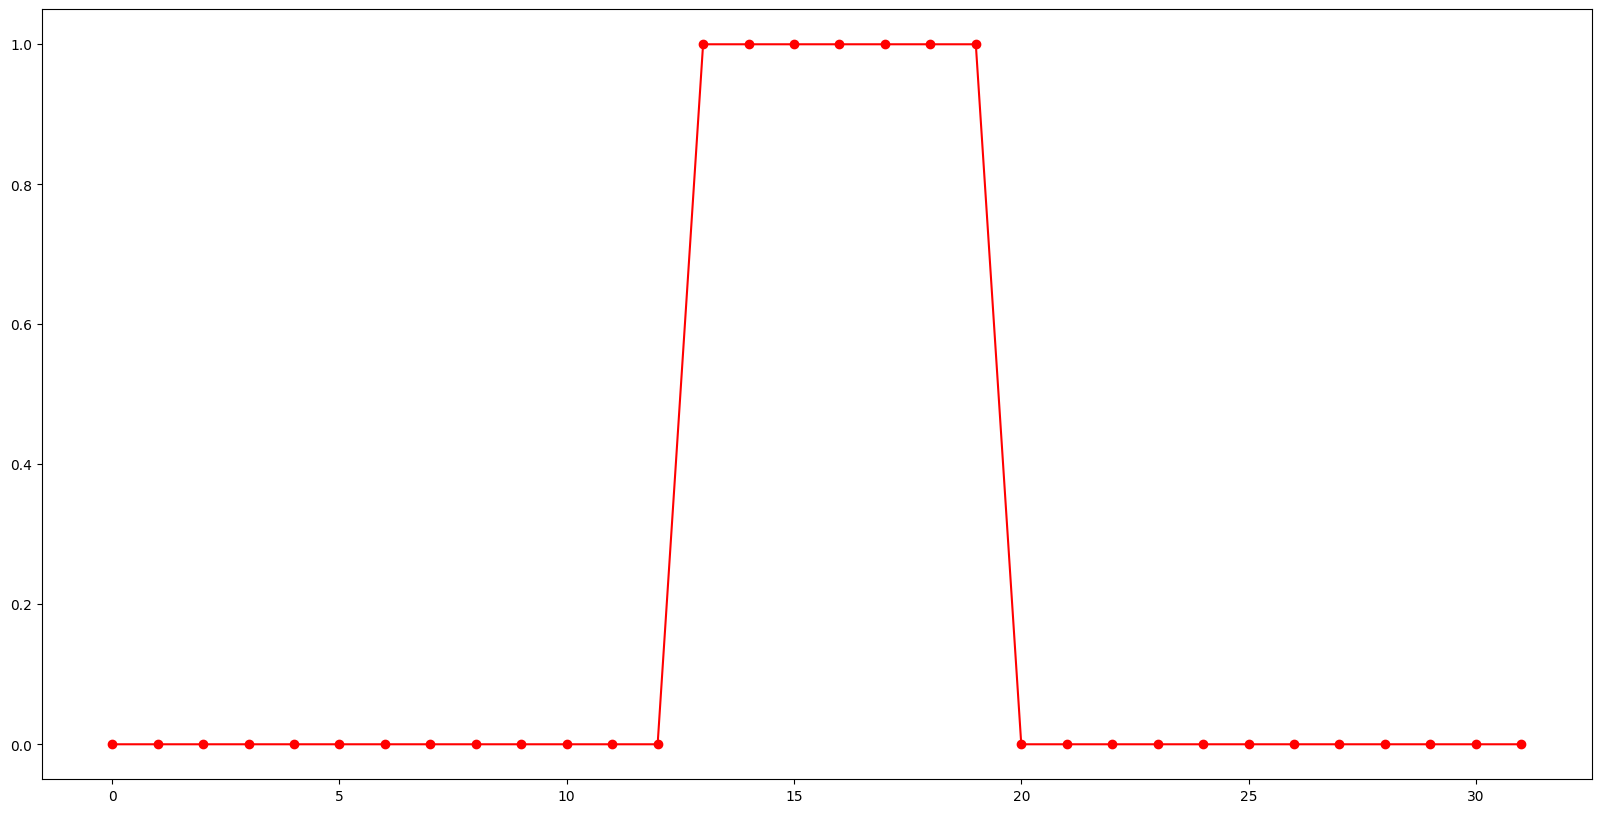

In [33]:
f, ax = plots()
ax.plot(abs(fftshift(LPF4_)), 'ro')
ax.plot(abs(fftshift(LPF4_)), 'r')
plt.show()